In [ ]:
# prompt: cmd to sync drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(400, 500, 3)
uint8


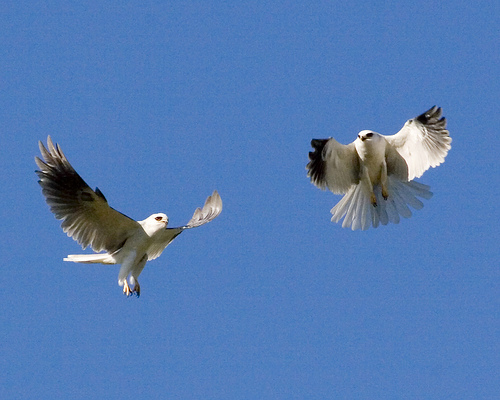

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000073.JPEG')
print(image.shape)
print(image.dtype)
cv2_imshow(image)

IMPLEMENT 2D CONVOLUTION LAYER WITH NUMPY

In [ ]:
#Implement Conv2D
class conv2d:
  def __init__(self,in_channels, out_channels, kernel_size, stride, padding):
    self.in_channels = in_channels
    self.out_channels = out_channels
    self.kernel_size = kernel_size
    self.stride = stride
    self.pad = padding
    self.kernel = np.random.randn(out_channels, in_channels, kernel_size, kernel_size)
    self.bias = np.random.randn(out_channels, 1)

  def forward(self,x):
    c,h,w = x.shape

    padded_x = np.pad(x, ((0,0),(self.pad,self.pad),(self.pad,self.pad)), mode='constant', constant_values=0)
    out_h = (h + 2 * self.pad - self.kernel_size) // self.stride + 1
    out_w = (w + 2 * self.pad - self.kernel_size) // self.stride + 1

    out = np.zeros((self.out_channels, out_h, out_w))

    # for i in range(self.out_channels):
    #   for j in range(out_h):
    #     for k in range(out_w):
    #       h_start = j * self.stride
    #       h_end = h_start + self.kernel_size
    #       w_start = k * self.stride
    #       w_end = w_start + self.kernel_size
    #       patch = padded_x[:, h_start:h_end, w_start:w_end]
    #       out[i, j, k] = np.sum(patch * self.kernel[i]) + self.bias[i].item()

    return out

#image = np.random.randn(3, 32, 32)
img = image.transpose(2,0,1)
#import an image from web
print(img.shape)
conv = conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
out = conv.forward(img)
print(out.shape)
#cv2_imshow(out.transpose(1,2,0))
#print(out)

(3, 400, 500)
(3, 400, 500)


IMPLEMENT BATCH NORMALIZATION WITH NUMPY

In [ ]:
import numpy as np
#across the batch channel-wise (one mean for each channel across batch (mean_axis=(0,2,3)))
class batchNorm:
  def __init__(self, ndims, epsilon=1e-5):
    self.gamma = np.ones((1,ndims,1,1))
    self.beta = np.ones((1,ndims,1,1))
    self.epsilon = epsilon

  def forward(self,x):
    mean_ = np.mean(x, axis=(0,2,3), keepdims=True)
    var_ = np.var(x, axis=(0,2,3), keepdims=True)

    x_norm = (x-mean_)/np.sqrt((var_+self.epsilon))

    return self.gamma * x_norm + self.beta

# one mean for each sample in a batch (mean_axis = (1,2,3))
class layerNorm:
  def __init__(self, ndims, epsilon=1e-5):
    self.gamma = np.ones((ndims,1,1,1))
    self.beta = np.ones((ndims,1,1,1))
    self.epsilon = epsilon

  def forward(self,x):
    mean_ = np.mean(x, axis=(1,2,3), keepdims=True)
    var_ = np.var(x, axis=(1,2,3), keepdims=True)

    x_norm = (x-mean_)/(var_+self.epsilon)
    x_norm = self.gamma * x_norm + self.beta

    return x_norm


# vec = np.arange(24).reshape(2,3,2,2)
# print(vec.shape)
#print(vec)

(2, 3, 2, 2)


In [ ]:
# prompt: add dimension to np array
# import numpy as np
# vec = np.expand_dims(image.transpose(2,0,1), axis=0)
# print(vec.shape)
# BNorm = batchNorm(vec.shape[1])
# vec_norm = BNorm.forward(vec)
# print('batchNorm: ',vec_norm.shape)
# cv2_imshow(vec_norm[0].transpose(1,2,0))

In [ ]:
BNorm = batchNorm(vec.shape[1])
vec_norm = BNorm.forward(vec)
print('batchNorm: ',vec_norm.shape)
print(vec_norm)
print('______________________________________')
LNorm = layerNorm(vec.shape[0])
vec_norm = LNorm.forward(vec)
print(vec_norm.shape)
print(vec_norm)

(2, 3, 2, 2)
[[[[-0.22884772 -0.06500135]
   [ 0.09884501  0.26269137]]

  [[-0.22884772 -0.06500135]
   [ 0.09884501  0.26269137]]

  [[-0.22884772 -0.06500135]
   [ 0.09884501  0.26269137]]]


 [[[ 1.73730863  1.90115499]
   [ 2.06500135  2.22884772]]

  [[ 1.73730863  1.90115499]
   [ 2.06500135  2.22884772]]

  [[ 1.73730863  1.90115499]
   [ 2.06500135  2.22884772]]]]
______________________________________
(2, 3, 2, 2)
[[[[0.53846193 0.62237794]
   [0.70629395 0.79020997]]

  [[0.87412598 0.95804199]
   [1.04195801 1.12587402]]

  [[1.20979003 1.29370605]
   [1.37762206 1.46153807]]]


 [[[0.53846193 0.62237794]
   [0.70629395 0.79020997]]

  [[0.87412598 0.95804199]
   [1.04195801 1.12587402]]

  [[1.20979003 1.29370605]
   [1.37762206 1.46153807]]]]


In [ ]:
# # prompt: print BNorm and LNorm two split of output console

# from IPython.display import display, HTML
# # This will display the content side-by-side in supported environments (like Colab)
# html_output = f"""
# <div style="display: flex;">
#     <div style="flex: 1; padding: 10px;">
#         <h2>BNorm Output</h2>
#         <pre>{BNorm.forward(vec)}</pre>
#     </div>
#     <div style="flex: 1; padding: 10px;">
#         <h2>LNorm Output</h2>
#         <pre>{LNorm.forward(vec)}</pre>
#     </div>
# </div>
# """
# display(HTML(html_output))

In [ ]:
import numpy as np
vec = np.arange(24).reshape(2,3,2,2)
print(vec.shape)
print(vec)
# vec = np.arange(24).reshape(2,3,2,2)
# print(vec)
# case1 = np.mean(vec, axis=1,keepdims=True)
# print(case1.shape)
# print(case1)
case2 = np.mean(vec, axis=(0,2,3), keepdims=True)
print(case2.shape)
print(case2)

(2, 3, 2, 2)
[[[[ 0  1]
   [ 2  3]]

  [[ 4  5]
   [ 6  7]]

  [[ 8  9]
   [10 11]]]


 [[[12 13]
   [14 15]]

  [[16 17]
   [18 19]]

  [[20 21]
   [22 23]]]]
(1, 3, 1, 1)
[[[[ 7.5]]

  [[11.5]]

  [[15.5]]]]


IMPLEMENT AVERAGE POOLING LATER WITH NUMPY

In [ ]:
#average pooling
import numpy as np
class averagePooling:
  def __init__(self, kernel_size, stride, padding=0):
    self.s = stride
    self.k = kernel_size
    self.p = padding

  def forward(self, x):
    #print(x.shape)
    c,h,w = x.shape
    h_out = (h+2*self.p-self.k)//self.s + 1
    w_out = (w+2*self.p-self.k)//self.s + 1
    x_out = np.zeros((c,h_out,w_out))

    for i in range(c):
      for j in range(h_out):
        for l in range(w_out):
          h_start = j * self.s
          w_start = l * self.s
          x_out[i,j,l] = np.mean(x[:, h_start:h_start+self.k, w_start:w_start+self.k])
    return x_out

vec = np.arange(384).reshape(2,3,8,8)
print(vec.shape)
avgPool = averagePooling(2,2)
avgVec = np.array([avgPool.forward(vec[i]) for i in range(vec.shape[0])])
print(avgVec.shape)

(2, 3, 8, 8)
(2, 3, 4, 4)


In [ ]:
import numpy as np
class averagePooling:
  def __init__(self, kernel_size, stride, padding=0):
    self.s = stride
    self.k = kernel_size
    self.p = padding

  def forward(self, x):
    #print(x.shape)
    c,h,w = x.shape
    h_out = (h+2*self.p-self.k)//self.s + 1
    w_out = (w+2*self.p-self.k)//self.s + 1
    x_out = np.zeros((c,h_out,w_out))

    #for i in range(c):
    for j in range(h_out):
      for l in range(w_out):
        h_start = j * self.s
        w_start = l * self.s
        x_out[:,j,l] = np.mean(x[:, h_start:h_start+self.k, w_start:w_start+self.k], axis=(1,2))
    return x_out

vec = np.arange(384).reshape(2,3,8,8)
print(vec.shape)
avgPool = averagePooling(2,2)
avgVec = np.array([avgPool.forward(vec[i]) for i in range(vec.shape[0])])
print(avgVec.shape)

(2, 3, 8, 8)
(2, 3, 4, 4)


(3, 400, 500)
poolShape:  (3, 100, 125)


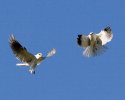

In [ ]:
import numpy as np
import cv2
#vec = np.expand_dims(image.transpose(2,0,1), axis=0)
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/samples/1.jpg')
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000073.JPEG',1)
vec = np.expand_dims(image.transpose(2,0,1), axis=0) if len(image.shape) < 3 else image.transpose(2,0,1)
print(vec.shape)
avgPool = averagePooling(4,4)
vec_pool = avgPool.forward(vec)
print('poolShape: ',vec_pool.shape)
cv2_imshow(vec_pool.transpose(1,2,0))

Image Processing

IMPLEMENT GAUSSIAN AND MEAN FILTER

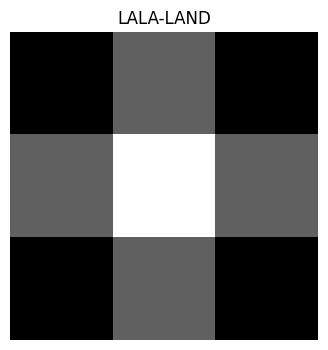

In [ ]:
#Filters
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

def plotSingle(vec):
  plt.figure(figsize=(4,4))
  plt.imshow(vec, cmap='gray')
  plt.title('LALA-LAND')
  plt.axis('off')
  plt.show()

def gaussianFilter(k_size, sigma):
  x = y = np.arange(-k_size//2+1, k_size//2+1)
  xx,yy = np.meshgrid(x,y)
  filter = (1/2*np.pi*(sigma**2))*np.exp(-((xx**2+yy**2)/(2*(sigma**2))))
  filter = filter/np.sum(filter)
  #print(filter)
  return filter

def meanFilter(k_size):
  filter = np.ones((k_size,k_size))
  return (1/np.sum(filter))*filter

#def bilateralFilter


G= gaussianFilter(3,1.0)
M = meanFilter(5)

#cv2_imshow(G)
#plt.imshow(G)
plotSingle(G)

(3, 533, 800) uint8
(3, 533, 800) uint8


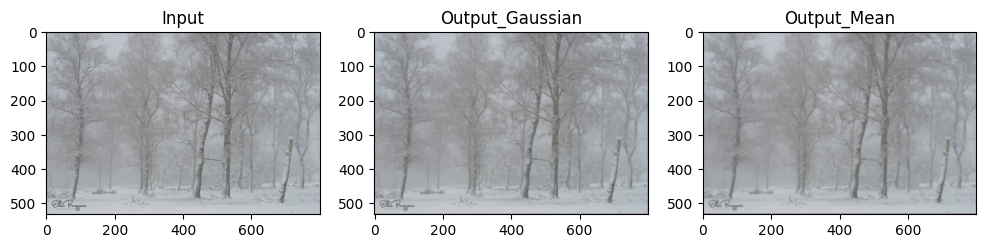

In [ ]:
def con2d(image, kernel):
  c,h, w = image.shape
  kh,kw = kernel.shape

  padImg = np.pad(image, ((0,0),(kh//2,kh//2),(kw//2,kw//2)), mode = 'constant', constant_values=0)

  outImg = np.zeros_like(image)

  for i in range(h):
    for j in range(w):
      outImg[:,i,j] = np.sum(padImg[:, i:i+kh, j:j+kw] * kernel[np.newaxis, :, :], axis =(1,2))
  return outImg

img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img = img.transpose(2,0,1)
print(img.shape, img.dtype)
G_filter = gaussianFilter(5, 1.0)
M_filter = meanFilter(5)
outImageG = con2d(img, G_filter)
# imgG = img
# for _ in range(3):
#   imgG = con2d(imgG, G_filter)
# outImageG = imgG
outImageM = con2d(img, M_filter)
print(outImageG.shape, outImageG.dtype)

plt.figure(figsize=(12,30))
plt.subplot(1,3,1)
plt.imshow(img.transpose(1,2,0))
plt.title('Input')

plt.subplot(1,3,2)
plt.imshow(outImageG.transpose(1,2,0))
plt.title('Output_Gaussian')

plt.subplot(1,3,3)
plt.imshow(outImageM.transpose(1,2,0))
plt.title('Output_Mean')

plt.show()

IMPLEMENT BILETRAL FILTER WITH NUMPY

In [ ]:
import numpy as np
import cv2

class biletFilter:
  def __init__(self, sigma_spatial, sigma_intensity, kernel_size):
    self.sigma_spatial = sigma_spatial
    self.sigma_intensity = sigma_intensity
    self.kernel_size = kernel_size

  def forward(self, img):
    c, h, w = img.shape
    d = self.kernel_size//2
    points = np.arange(-d, d+1)
    #print(points)
    x, y = np.meshgrid(points,points)

    filter = np.exp(-(x**2+y**2)/(2*self.sigma_spatial**2))
    G_filter = filter/np.sum(filter)
    #print(G_filter)

    padImg = np.pad(img, ((0,0),(d,d),(d,d)), mode='reflect')
    output = np.zeros_like(img, dtype=img.dtype)

    for i in range(h):
      for j in range(w):
        #print(i,j)
        patch = padImg[:, i:i+self.kernel_size, j:j+self.kernel_size]

        I_diff = patch-img[:,i,j][:, np.newaxis, np.newaxis]
        I_guss = (I_diff**2)/(2*self.sigma_intensity**2)
        I_guss -= np.max(I_guss,axis=(1,2), keepdims=True)
        I_filter = np.exp(-I_guss)
        #print(I_filter)

        B_filter = G_filter * I_filter
        weight = np.sum(B_filter, axis=(1,2))
        print(weight)

        output[:,i,j] = np.sum(patch * B_filter, axis=(1,2))/np.maximum(weight, 1e-8)

    return output

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000013.JPEG')
rgbImg = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(rgbImg.shape)
bFilter = biletFilter(10.0, 2.0, 33)
filteredImage = bFilter.forward(rgbImg.transpose(2,0,1))

Streaming output truncated to the last 5000 lines.
[7.99078522e+11 8.25047786e+11 7.41778918e+11]
[8.67168706e+11 7.73612398e+11 7.38418417e+11]
[7.86822234e+11 6.86525724e+11 5.22612518e+11]
[7.74677054e+11 6.74921446e+11 5.12854826e+11]
[8.30038400e+11 7.34877959e+11 7.00904953e+11]
[8.34748657e+11 7.91050876e+11 1.00946759e+12]
[7.87629286e+11 7.67735325e+11 8.32004926e+11]
[7.89614691e+11 7.55031749e+11 9.44117492e+11]
[7.64265968e+11 7.29899949e+11 9.03469475e+11]
[7.80223551e+11 7.35867792e+11 9.41084916e+11]
[7.64224526e+11 7.20002199e+11 8.99473065e+11]
[7.92056244e+11 7.33764047e+11 8.72353145e+11]
[7.88911291e+11 7.58493761e+11 7.94643739e+11]
[7.55171507e+11 7.47557299e+11 7.74238757e+11]
[7.64136931e+11 7.60095606e+11 7.51124726e+11]
[7.91291196e+11 7.72212850e+11 7.40989144e+11]
[7.73461104e+11 7.74347044e+11 7.00059228e+11]
[7.74808877e+11 7.78338019e+11 6.90004976e+11]
[3.90758023e+12 7.75401816e+11 6.68668462e+11]
[7.24055996e+11 7.64186475e+11 6.83040504e+11]
[6.748948

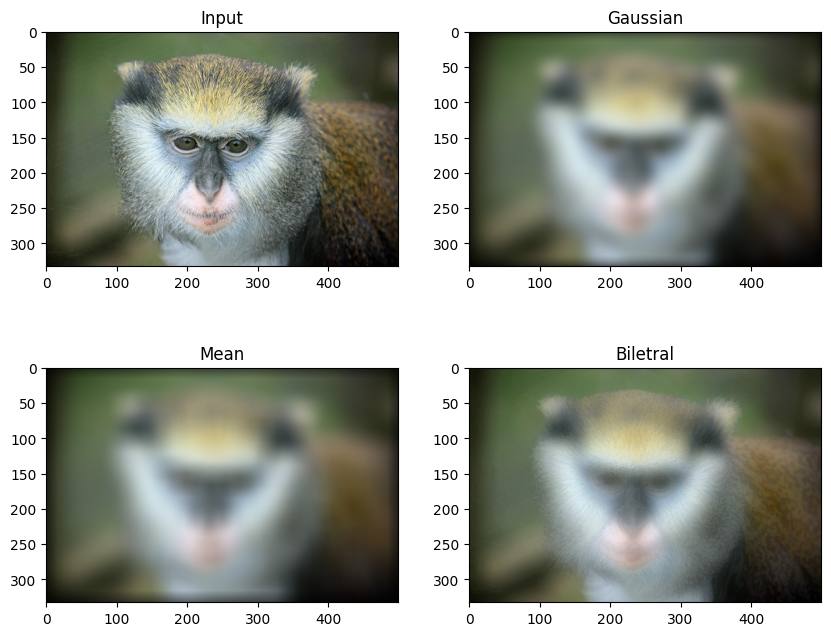

In [ ]:
import matplotlib.pyplot as plt
G_filter = gaussianFilter(33, 10.0)
G_filtered = con2d(rgbImg.transpose(2,0,1), G_filter)
M_filter = meanFilter(33)
M_filtered = con2d(rgbImg.transpose(2,0,1), M_filter)

plt.figure(figsize=(10, 8))
plt.subplot(221)
plt.imshow(rgbImg)
plt.title('Input')
plt.subplot(222)
plt.title('Gaussian')
plt.imshow(G_filtered.transpose(1,2,0))
plt.subplot(223)
plt.title('Mean')
plt.imshow(M_filtered.transpose(1,2,0))
plt.subplot(224)
plt.imshow(filteredImage.transpose(1,2,0))
plt.title('Biletral')
plt.show()

LOAD AN IMAGE AND GENERATE A BINARY SEGMENTATION MASK WITH THRESHOLDING

(376, 500, 3)
(376, 500)


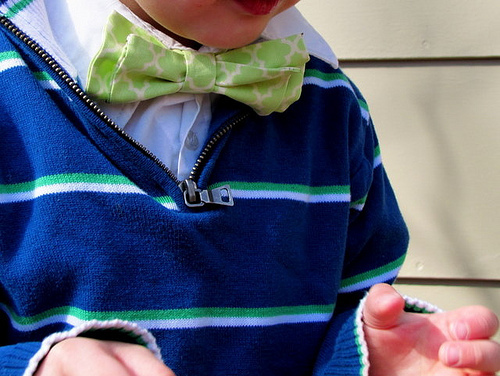

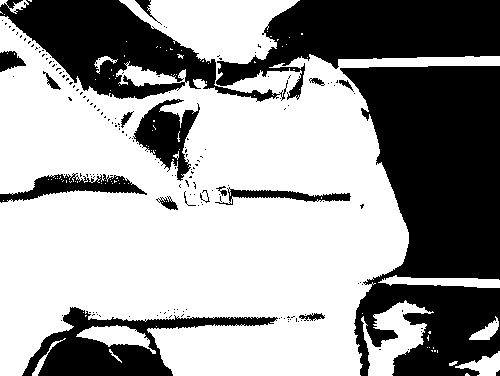

In [ ]:
import numpy as np
from scipy.special import softmax
import cv2
from google.colab.patches import cv2_imshow

#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000013.JPEG')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000202.JPEG')
#/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000013.JPEG
#img = cv2.resize(img, (224,224)) #/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000202.JPEG
print(img.shape)
grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(np.unique(grayImg))
mask = np.where(grayImg>128,1, 0)
mask = 1-mask
print(mask.shape)
cv2_imshow(img)
cv2_imshow(mask*255)

APPLY DENSE CRF ON ABOVE IMAGE AND MASK PAIR

RGB SHAPE:  (376, 500, 3)
U SHAPE:  (2, 188000)
MAP SHAPE:  (376, 500)
[1]


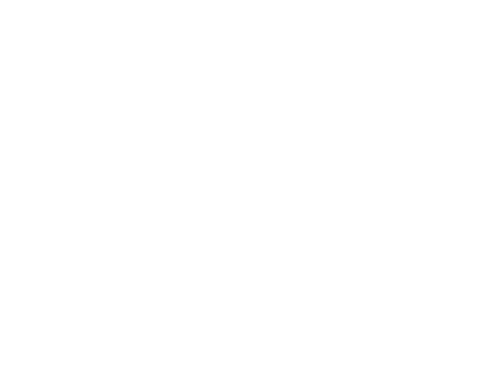

In [ ]:
import pydensecrf.densecrf as dcrf
import pydensecrf.utils as utils

rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#rgbImg = rgbImg.transpose(2,0,1)
rgbImg = np.ascontiguousarray(rgbImg)
print('RGB SHAPE: ',rgbImg.shape)
n_labels = 2

# fg = mask
# bg = 1- fg
# mask2d = np.stack((fg,bg))
#print(mask2d.shape)
# mask2d = softmax(mask2d, axis=0)
h, w, c = rgbImg.shape


d = dcrf.DenseCRF2D(w, h, n_labels)  # width, height, nlabels
U = utils.unary_from_labels(mask, n_labels, gt_prob=0.45)     # Get the unary in some way.
#U = utils.unary_from_softmax(mask2d)     # Get the unary in some way.
print('U SHAPE: ',U.shape)        # -> (5, 480, 640)
#print(U.dtype)        # -> dtype('float32')
#U = U.reshape((n_labels,-1)) # Needs to be flat.
U = np.ascontiguousarray(U)
d.setUnaryEnergy(U)

d.addPairwiseGaussian(sxy=3, compat=7)
d.addPairwiseBilateral(sxy=50, srgb=5, rgbim=rgbImg, compat=10)
# Or alternatively: d.setUnary(ConstUnary(U))
Q = d.inference(3)

map = np.argmax(Q, axis=0).reshape((h,w))
print('MAP SHAPE: ', map.shape)
print(np.unique(map))
cv2_imshow(map*255)

**IMAGE** **PROCESSING** PART 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPLEMENT COMMULATIVE HISTOGRAM EQULAZATION

(224, 224)


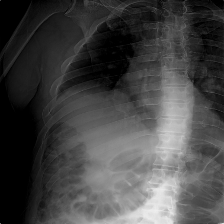

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt


image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/samples/4.jpeg', 0)
#image = cv2.imread('/content/drive/MyDrive/Colab Notebooks/sampleRGB/ILSVRC2012_val_00000013.JPEG',0)

image = cv2.resize(image, (224,224))
print(image.shape)
cv2_imshow(image)

In [ ]:
val, count = np.unique(image, return_counts=True)
# for v,c in zip(val,count):
#   print(v,c)
#print(val)
pixCount = np.zeros(256, dtype='int')
comPixCount = np.zeros(256, dtype = 'int')
total = 0
for p in range(len(pixCount)):
  pixCount[p] = np.sum(image==p)
  total += pixCount[p]
  comPixCount[p] = total
#print(pixCount)
#print(comPixCount)

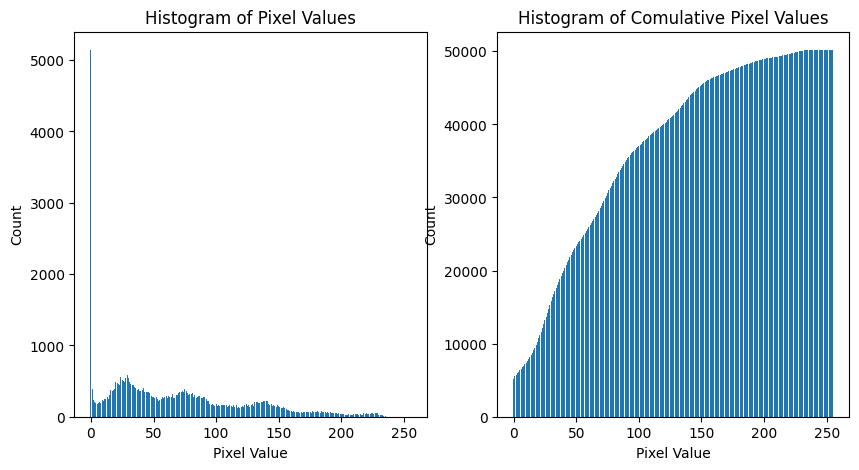

In [ ]:
# prompt: plot val and count
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(range(256), pixCount)
#plt.bar(range(256), comPixCount)
plt.title('Histogram of Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(range(256), comPixCount)
plt.title('Histogram of Comulative Pixel Values')
plt.xlabel('Pixel Value')
plt.ylabel('Count')
plt.show()

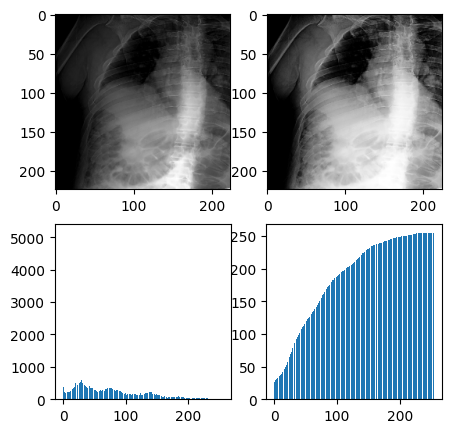

In [ ]:
normPixCount = (comPixCount/total)*255
newImage = normPixCount[image.flatten()].reshape(224,224)
#cv2_imshow(newImage)
plt.figure(figsize=(5,5))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(newImage, cmap='gray')
plt.subplot(223)
plt.bar(range(256), pixCount)
plt.subplot(224)
plt.bar(range(256), normPixCount)
plt.show()